In [218]:
import time
import pandas as pd
import numpy as np

from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split

data = pd.read_csv('version2.csv')

data=data.drop(['Unnamed: 0','priceByArea'],axis=1)

In [223]:
import time
import pandas as pd
import numpy as np

from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split

data = pd.read_csv('version3.csv')
data=data.drop(['Unnamed: 0'],axis=1)
#data=data.drop(['Unnamed: 0','newdevelopment','renew','good','hasParkingSpace','studio'],axis=1)

In [224]:
data.columns

Index([u'rooms', u'bathrooms', u'exterior', u'hasLift', u'size', u'floor',
       u'longitude', u'latitude', u'price', u'hasParkingSpace',
       u'isParkingSpaceIncludedInPrice', u'chalet', u'duplex', u'flat',
       u'penthouse', u'studio', u'good', u'newdevelopment', u'renew'],
      dtype='object')

In [225]:
y =data['price']
X_temp = data.drop(['price'], axis=1)
X=np.array(X_temp)
y=np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 1 (0.510239)
2. feature 0 (0.062772)
3. feature 18 (0.021787)
4. feature 6 (0.021672)
5. feature 14 (0.021638)
6. feature 20 (0.021623)
7. feature 4 (0.021617)
8. feature 2 (0.021575)
9. feature 8 (0.021563)
10. feature 9 (0.021424)
11. feature 17 (0.021368)
12. feature 7 (0.021364)
13. feature 15 (0.021347)
14. feature 10 (0.021290)
15. feature 5 (0.021228)
16. feature 16 (0.021220)
17. feature 11 (0.021190)
18. feature 13 (0.021114)
19. feature 12 (0.021110)
20. feature 3 (0.020966)
21. feature 19 (0.020950)
22. feature 21 (0.020945)


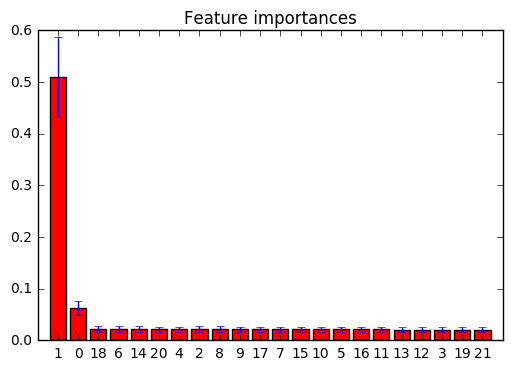

In [203]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=5113,
                           n_features=len(X_temp.columns),
                           n_redundant=0,
                           n_repeated=0,
                           random_state=0,
                           shuffle=False)
                           #n_informative=5)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=600,
                              random_state=44)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)#data.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()

In [208]:
X_temp.columns[indices]

Index([u'propertyCode', u'ID', u'hasVideo', u'size', u'latitude', u'hasLift',
       u'floor', u'thumbnail', u'rooms', u'bathrooms', u'url', u'exterior',
       u'longitude', u'province', u'propertyType', u'showAddress',
       u'municipality', u'neighborhood', u'district', u'numPhotos',
       u'newDevelopment', u'priceByArea'],
      dtype='object')

In [226]:
#Linear regression

# Set the parameters by cross-validation
#tuned_parameters = [{'bootstrap': [True, False],'criterion': ["gini", "entropy"],'n_estimators': [10, 50, 100, 200, 500]}]
tuned_parameters = [{'normalize' : [True,False]}]
#scores = ['precision', 'recall']

#scores = ['precision']
#scores = ['f1']

#print "Tuning hyper-parameters for %s" % score
print
clf = GridSearchCV(LinearRegression(fit_intercept=True), tuned_parameters, cv=10, scoring='mean_absolute_error')
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."



Best parameters set found on training set:

{'normalize': True}

Mean Absolute Error:

482.221386723

The model is trained on the training set. The scores are computed on the testing set.


In [227]:
#Random Forest Regressor
#n_estimators estimate

start_time = time.time()
# Set the parameters by cross-validation
#tuned_parameters = [{'bootstrap': [True, False],'criterion': ["gini", "entropy"],'n_estimators': [10, 50, 100, 200, 500]}]
tuned_parameters = [{'bootstrap': [True, False],
                     'n_estimators': [600]}]
#print "Tuning hyper-parameters for %s" % score
print
#clf = GridSearchCV(RandomForestRegressor(n_estimators=600,random_state=44, n_jobs=-1), tuned_parameters, cv=10, 
                   #scoring='mean_absolute_error')
clf = RandomForestRegressor(n_estimators=200,random_state=44)
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
#print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."
print("--- %s seconds ---" % (time.time() - start_time))


Best parameters set found on training set:


Mean Absolute Error:

312.375609862

The model is trained on the training set. The scores are computed on the testing set.
--- 3.2457652092 seconds ---


In [12]:
#Random Forest Regressor
#n_estimators estimate

start_time = time.time()
# Set the parameters by cross-validation
#tuned_parameters = [{'bootstrap': [True, False],'criterion': ["gini", "entropy"],'n_estimators': [10, 50, 100, 200, 500]}]
tuned_parameters = [{'bootstrap': [True, False],
                     'n_estimators': [500, 550, 600, 650, 700, 750]}]
#scores = ['precision', 'recall']

#scores = ['precision']
#scores = ['f1']

#print "Tuning hyper-parameters for %s" % score
print
clf = GridSearchCV(RandomForestRegressor(n_estimators=10, random_state=44, n_jobs=-1), tuned_parameters, cv=10, 
                   scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."
print("--- %s seconds ---" % (time.time() - start_time))


Best parameters set found on training set:

{'n_estimators': 600, 'bootstrap': True}

Mean Absolute Error:

253.666490864

The model is trained on the training set. The scores are computed on the testing set.
--- 311.885739803 seconds ---


In [13]:
#Random Forest Regressor
#n_estimators estimate

start_time = time.time()
# Set the parameters by cross-validation
#tuned_parameters = [{'bootstrap': [True, False],'criterion': ["gini", "entropy"],'n_estimators': [10, 50, 100, 200, 500]}]
tuned_parameters = [{'bootstrap': [True, False],
                     'n_estimators': [550, 575, 600, 625, 650]}]
#scores = ['precision', 'recall']

#scores = ['precision']
#scores = ['f1']

#print "Tuning hyper-parameters for %s" % score
print
clf = GridSearchCV(RandomForestRegressor(n_estimators=10, random_state=44, n_jobs=-1), tuned_parameters, cv=10, 
                   scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."
print("--- %s seconds ---" % (time.time() - start_time))


Best parameters set found on training set:

{'n_estimators': 625, 'bootstrap': True}

Mean Absolute Error:

253.564404188

The model is trained on the training set. The scores are computed on the testing set.
--- 255.241167068 seconds ---


In [14]:
#Random Forest Regressor
#min_samples_leaf estimate

start_time = time.time()
# Set the parameters by cross-validation
#tuned_parameters = [{'bootstrap': [True, False],'criterion': ["gini", "entropy"],'n_estimators': [10, 50, 100, 200, 500]}]
tuned_parameters = [{'bootstrap': [True, False],
                     'n_estimators': [10, 50, 100, 200, 500, 600, 750],
                     'min_samples_leaf': [1, 5, 10, 50, 100, 200]}]
#scores = ['precision', 'recall']

#scores = ['precision']
#scores = ['f1']

#print "Tuning hyper-parameters for %s" % score
print
clf = GridSearchCV(RandomForestRegressor(n_estimators=10, random_state=44, n_jobs=-1), tuned_parameters, cv=10, 
                   scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."
print("--- %s seconds ---" % (time.time() - start_time))


Best parameters set found on training set:

{'n_estimators': 600, 'bootstrap': True, 'min_samples_leaf': 1}

Mean Absolute Error:

253.666490864

The model is trained on the training set. The scores are computed on the testing set.
--- 985.391719103 seconds ---
